In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('C:/Users/w1856228/Downloads/creditcard.csv')                

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
fraud_data = data[data.Class == 1]
n_fraud_data = data[data.Class == 0]

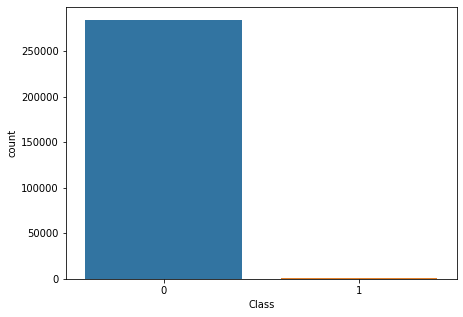

In [8]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = data)

In [9]:
#Data is heavily imbalanced(0.00172% fraud data). It should be balanced to avoid bias that weakens the minority class

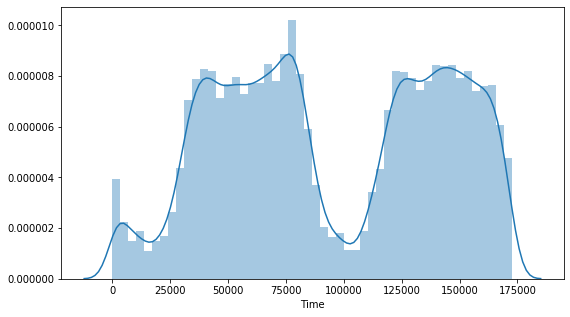

In [10]:
plt.figure(figsize = (9,5))
sns.distplot(data['Time'])

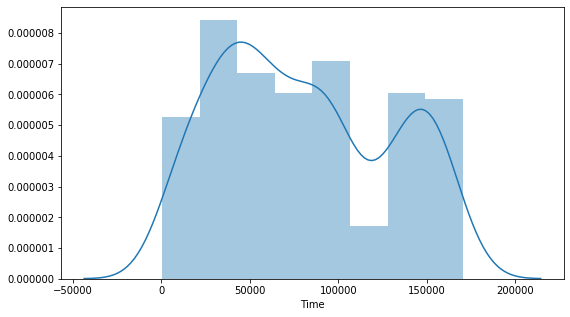

In [11]:
#fraud transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(fraud_data['Time'])

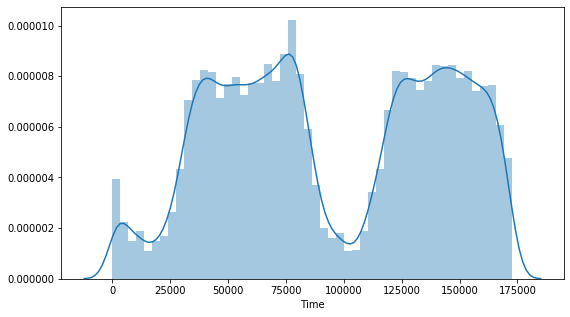

In [12]:
#Normal transactions time distribution
plt.figure(figsize = (9,5))
sns.distplot(n_fraud_data['Time'])

Text(0.5, 1.0, 'Normal Transactions')

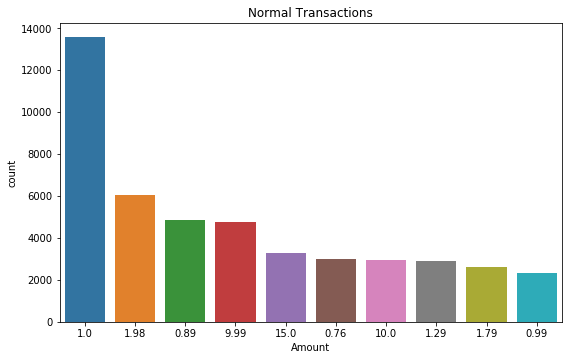

In [13]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = n_fraud_data['Amount'].value_counts().index[:10], data = n_fraud_data)
plt.title('Normal Transactions')

Text(0.5, 1.0, 'Fraud Transactions')

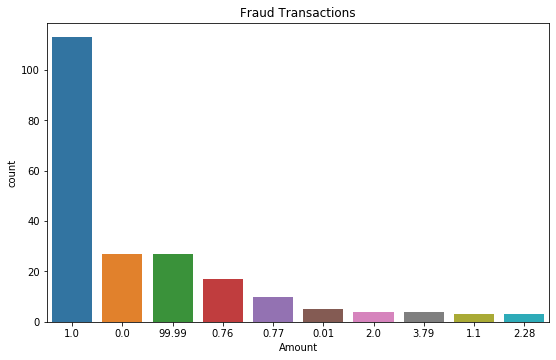

In [14]:
plt.figure(figsize = (9,5.5))
sns.countplot('Amount', order = fraud_data['Amount'].value_counts().index[:10], data = fraud_data)
plt.title('Fraud Transactions')

## 1. It is quite interesting to see that 99.99 dollars is in top 3 of fraud transactions but not in Normal transactions and It has same frequency of 0 dollars
## 2. Fraudsters still does the transaction with this amount even it is such a large money to be unnoticed by the customer .

# Undersampling

In [15]:
# scaling the amount and time feature using minmaxscaler
m = MinMaxScaler()
data['scaled_amount'] = m.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = m.fit_transform(data['Time'].values.reshape(-1,1))
data.drop(['Amount', 'Time'], axis = 1, inplace= True)

In [16]:
majority_class = n_fraud_data.index
minority_class = fraud_data.index

In [17]:
minority_class_len = len(minority_class)
minority_class_len

492

In [18]:
random_majority_index = np.random.choice(majority_class, minority_class_len, replace = False)
len(random_majority_index)

492

In [19]:
under_sampled_index = np.concatenate([random_majority_index,minority_class])

In [20]:
under_sampled_data = data.loc[under_sampled_index]
under_sampled_data.index = range(0, len(under_sampled_data))

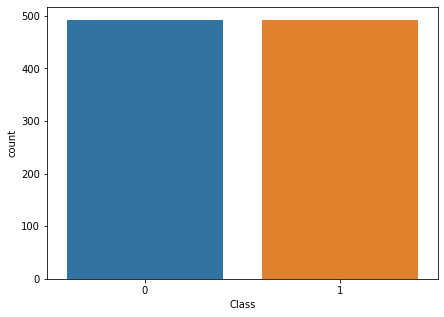

In [21]:
plt.figure(figsize = (7,5))
sns.countplot('Class', data = under_sampled_data)

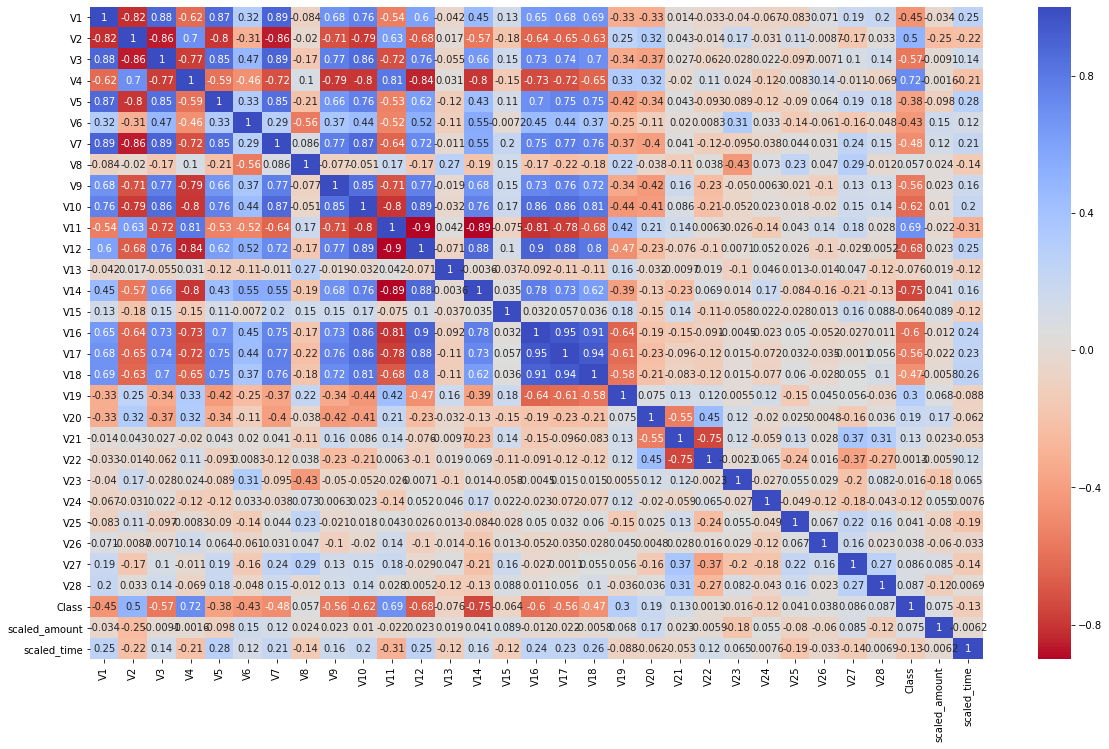

In [22]:
# correlation on under sampled data
plt.figure(figsize = (20,12))
cor = under_sampled_data.corr()
sns.heatmap(cor, cmap='coolwarm_r', annot=True)

In [23]:
X = under_sampled_data.drop('Class', axis= 1)
y = under_sampled_data['Class']

In [24]:
#splitting the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.33, random_state = 42, stratify = y)

In [25]:
#train data
print('Non-fraud data is', len(y_train[y_train == 0]))
print('fraud data is',len(y_train[y_train == 1]))

Non-fraud data is 329
fraud data is 330


In [26]:
#test data
print('Non-fraud data is', len(y_test[y_test == 0]))
print('fraud data is',len(y_test[y_test == 1]))

Non-fraud data is 163
fraud data is 162


In [27]:
X1 = data.drop('Class', axis= 1)
y1 = data['Class']

In [28]:
sm = SMOTE(random_state=42, sampling_strategy = 1)
X_new, y_new = sm.fit_resample(X1,y1)

In [29]:
#after sampling
print('Non-fraud data is', len(y_new[y_new == 0]))
print('fraud data is',len(y_new[y_new == 1]))

Non-fraud data is 284315
fraud data is 284315


In [30]:
X1_df = data.drop('Class', axis= 1)
Smote_data = pd.DataFrame(X_new, columns= X1_df.columns)
Smote_data['Class'] = y_new

In [31]:
rf_clf = RandomForestClassifier()
rf = rf_clf.fit(X_new,y_new) 

In [32]:
fimp_col = []
fimp = []
for i,column in enumerate(X1):
    fimp_col.append(column)
    fimp.append(rf.feature_importances_[i])

In [33]:
fimp_df = pd.DataFrame(zip(fimp_col,fimp), columns = ['Features', 'Feature Importance'])
fimp_df = fimp_df.sort_values('Feature Importance', ascending = False).reset_index()

In [34]:
fimp_df['F_imp_cumulative'] = fimp_df['Feature Importance'].cumsum()
fimp_df

,index,Features,Feature Importance,F_imp_cumulative
0,13,V14,0.185743,0.185743
1,10,V11,0.124292,0.310035
2,11,V12,0.118816,0.428851
3,9,V10,0.118108,0.546959
4,3,V4,0.094735,0.641694
5,16,V17,0.059171,0.700866
6,15,V16,0.041559,0.742425
7,2,V3,0.028719,0.771144
8,6,V7,0.025127,0.796271
9,1,V2,0.022321,0.818591


In [35]:
Not_important_features = list(fimp_df['Features'][12:])
print(Not_important_features)

['V8', 'V6', 'V18', 'V1', 'scaled_amount', 'V13', 'V27', 'V19', 'V5', 'V20', 'V26', 'V28', 'V15', 'V23', 'scaled_time', 'V25', 'V22', 'V24']


Text(0.5, 1.0, 'Feature Importance-SMOTE Data')

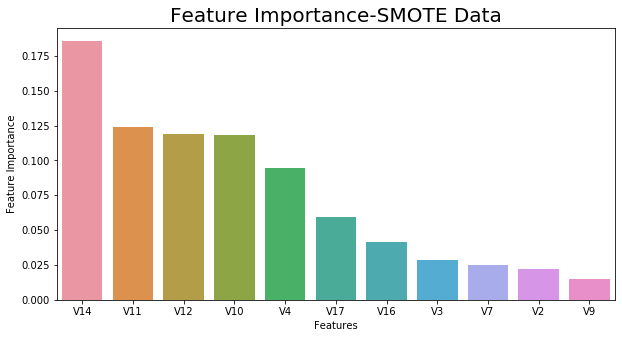

In [36]:
# top 10 features based on feature importance
plt.figure(figsize = (10,5))
sns.barplot('Features','Feature Importance', data = fimp_df[:11])
plt.title('Feature Importance-SMOTE Data',size = 20)

# From above graphs we can see these 11 features covers 85% of variance in the data

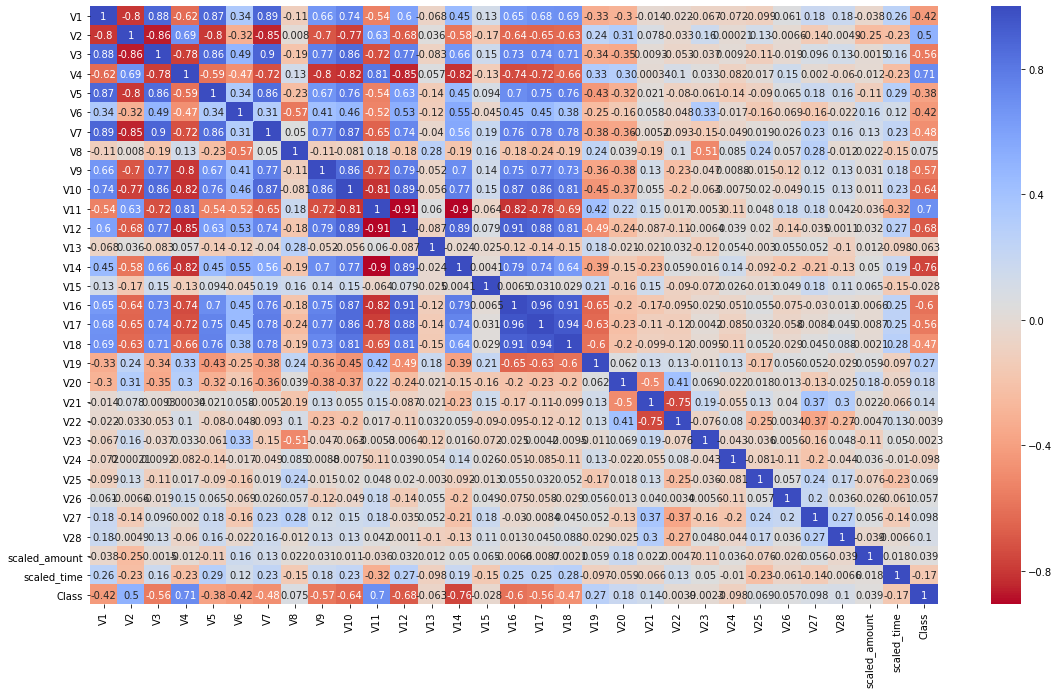

In [37]:
# correlation on SMOTE data
plt.figure(figsize = (19,11))
cor1 = Smote_data.corr()
sns.heatmap(cor1, cmap='coolwarm_r', annot = True)

### 1. V9,V10,V12,V14,V16,V17 are negatively correlated with the class
### 2. V2,V4,V11 are Positively Correlated with the class

In [38]:
# dropping the insignificant features
Final_data = data.drop(Not_important_features, axis=1)

In [39]:
Final_data.head(5)

,V2,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V21,Class
0,-0.072781,2.536347,1.378155,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,-0.018307,0
1,0.266151,0.166480,0.448154,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.225775,0
2,-1.340163,1.773209,0.379780,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0.247998,0
3,-0.185226,1.792993,-0.863291,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,-0.108300,0
4,0.877737,1.548718,0.403034,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.009431,0


# Cross Validation - Under sampled data

In [40]:
skfold = StratifiedKFold(n_splits = 5)
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}
cv_performance_metrics = list(['Fit_time','score_time','test_accuracy', 'test_Ppecision', 'test_recall', 'test_F1'])

In [41]:
# Algorithms
log_reg = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

# parameters
kfold = KFold(n_splits = 5)
algo_list = list([log_reg,knn,svc,d_tree,rf_clf])
algo_name = list(['Logistic regression','K Nearest Neighbor','Support vector classifier', 'Decision Tree', 'Random Forest'])
performance_metrics = list(['Accuracy', 'Precision', 'Recall', 'F1','AUC_ROC_Score'])

In [42]:
# cross validation on various algorithms
def cross_validation(algo,X,y,fold,scoring):
    algo_score = []
    for i in algo:
        score = cross_validate(i, X, y, cv = fold, scoring = scoring)
        cv_metrics = dict(zip(cv_performance_metrics,[round(np.mean(score[j]),6) for j in score]))
        algo_score.append(cv_metrics)
    return algo_score

In [43]:
result = cross_validation(algo_list, X, y,skfold,scoring)

In [44]:
cv_score = dict(zip(algo_name,result))
cv_score

{'Logistic regression': {'Fit_time': 0.038578,
  'score_time': 0.015578,
  'test_accuracy': 0.92378,
  'test_Ppecision': 0.962824,
  'test_recall': 0.882045,
  'test_F1': 0.920219},
 'K Nearest Neighbor': {'Fit_time': 0.007267,
  'score_time': 0.031782,
  'test_accuracy': 0.925811,
  'test_Ppecision': 0.968901,
  'test_recall': 0.880148,
  'test_F1': 0.921672},
 'Support vector classifier': {'Fit_time': 0.028598,
  'score_time': 0.022582,
  'test_accuracy': 0.931907,
  'test_Ppecision': 0.986488,
  'test_recall': 0.876087,
  'test_F1': 0.927402},
 'Decision Tree': {'Fit_time': 0.036913,
  'score_time': 0.009763,
  'test_accuracy': 0.88818,
  'test_Ppecision': 0.883772,
  'test_recall': 0.89431,
  'test_F1': 0.888597},
 'Random Forest': {'Fit_time': 0.489687,
  'score_time': 0.03266,
  'test_accuracy': 0.928846,
  'test_Ppecision': 0.96977,
  'test_recall': 0.886209,
  'test_F1': 0.925442}}

In [45]:
def model(algo,X_train,y_train, X_test, y_test):
    algo_performance = []
    for i in algo:
        clf = i.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        Accuracy = accuracy_score(y_test, y_pred)
        Precision = precision_score(y_test, y_pred)
        Recall = recall_score(y_test, y_pred)
        F1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred)
        metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
        algo_performance.append(metrics)
    return algo_performance

In [46]:
t_result = model(algo_list,X_train, y_train, X_test, y_test)

In [47]:
final_score = dict(zip(algo_name,t_result))
final_score

{'Logistic regression': {'Accuracy': 0.9569230769230769,
  'Precision': 0.9743589743589743,
  'Recall': 0.9382716049382716,
  'F1': 0.9559748427672956,
  'AUC_ROC_Score': 0.9568658638188291},
 'K Nearest Neighbor': {'Accuracy': 0.9538461538461539,
  'Precision': 0.9741935483870968,
  'Recall': 0.9320987654320988,
  'F1': 0.9526813880126184,
  'AUC_ROC_Score': 0.9537794440657428},
 'Support vector classifier': {'Accuracy': 0.9476923076923077,
  'Precision': 0.9931972789115646,
  'Recall': 0.9012345679012346,
  'F1': 0.9449838187702265,
  'AUC_ROC_Score': 0.9475497992880406},
 'Decision Tree': {'Accuracy': 0.9384615384615385,
  'Precision': 0.927710843373494,
  'Recall': 0.9506172839506173,
  'F1': 0.9390243902439024,
  'AUC_ROC_Score': 0.9384988260243884},
 'Random Forest': {'Accuracy': 0.9661538461538461,
  'Precision': 0.9870967741935484,
  'Recall': 0.9444444444444444,
  'F1': 0.9652996845425867,
  'AUC_ROC_Score': 0.9660872528970688}}

# Recall score of models on Undersampled data
#### 1. Logistic regression - 0.957
#### 2. Knn - 0.932
#### 3. Random forest - 0.944
#### 4. Decision tree - 0.951
#### 5. Svc - 0.925

# SMOTE during Cross-validation

#### 1. We cannot do oversampling before cross validation because when cross validation with oversampled data the both training and validation set will have oversampled minority class.
#### 2. Model will learn about the oversampled data during training and easily predicts the minority class(Fraud transactions) which result in higher precision score on validation set data.
#### 3. This model will not generalize well on test data or unseen data so we need to do Smote oversampling during cross-validation.

In [48]:
new_X = Final_data.drop('Class', axis= 1).values
new_y = Final_data['Class'].values

In [49]:
new_X

array([[-0.07278117,  2.53634674,  1.37815522, ..., -0.47040053,
         0.20797124, -0.01830678],
       [ 0.26615071,  0.16648011,  0.44815408, ...,  0.46391704,
        -0.11480466, -0.22577525],
       [-1.34016307,  1.77320934,  0.37977959, ..., -2.89008319,
         1.10996938,  0.24799815],
       ...,
       [-0.30125385, -3.24963981, -0.55782812, ...,  0.14071598,
         0.31350179,  0.23204504],
       [ 0.53048251,  0.70251023,  0.68979917, ..., -0.60857713,
         0.50992846,  0.26524492],
       [-0.18973334,  0.70333737, -0.50627124, ..., -0.30262009,
        -0.66037665,  0.26105733]])

In [50]:
# cross validation on various algorithms
def cross_validation(algo,X,y):
    
    algo_performance = []
    
    for train, test in kfold.split(X,y):
    
        x_train = X[train]
        y_train = y[train]
        x_test = X[test]
        y_test = y[test]
        
        sm = SMOTE(random_state=42, sampling_strategy = 1.0)
        X_train_sam, y_train_sam = sm.fit_resample(x_train, y_train)
        
        for i in algo:
            clf = i.fit(X_train_sam, y_train_sam)
            y_pred = clf.predict(x_test)
            Accuracy = accuracy_score(y_test, y_pred)
            Precision = precision_score(y_test, y_pred)
            Recall = recall_score(y_test, y_pred)
            F1 = f1_score(y_test, y_pred)
            auc_score = roc_auc_score(y_test, y_pred)
            metrics = dict(zip(performance_metrics,[Accuracy,Precision,Recall,F1,auc_score]))
            algo_performance.append(metrics)
    return algo_performance

In [51]:
# training in SMOTE data with most important features # 9:10 pm

In [ ]:
result = cross_validation(algo_list, new_X, new_y)

# Recall score of models on SMOTE data
Logistic regression - 0.955
Knn - 0.911
Random forest - 0.879
Decision tree - 0.847
Svc - 0.669
# Conclusion
we are going to evaluate model based on Recall and precision scores.

Recall – Out of all actual frauds how many frauds my model predicted correctly i.e True positive / (True positive + False Negative ).
Precision - Out of all predicted frauds how many frauds my model predicted correctly i.e True Positive / (True positive + False Positive)
# Smote data
Since our Logistic Regression model has the highest recall score (0.955) compared to other models it is best in predict the fraud transaction but it has poor precision score (0.08).
In terms of maintaining good recall score ( 0.88) and precision score ( 0.76) the Random Forest model performs better than Logistic Regression
# Undersampled data
Logistic regression performs well with excellent recall and precision score of 0.99 and 0.96 respectively followed by Random Forest with excellent precision score of 1 and recall of 0.94.